# 7 Multivariate plotting



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_path="https://minio.lab.sspcloud.fr/pengfei/diffusion/data_viz"
footballer_input_file=f'{root_path}/footballer.csv'

In [3]:
df=pd.read_csv(footballer_input_file,index_col=0,encoding='utf8')

/tmp/ipykernel_234897/4024723477.py:1: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(footballer_input_file,index_col=0,encoding='utf8')


In [4]:
print(df['Value'].head(5))

0    €95.5M
1     €105M
2     €123M
3      €97M
4      €61M
Name: Value, dtype: object


## 7.1 Clean the value column

break the Value column(€95.5M) into two columns, Unit column can be M (million) or 0
The Value (M) column represents the player's value in Million,
examples:
€95.5M -> M, 95.5
€0 -> 0, 0

In [5]:
footballers= df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0,
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
#print(footballers[footballers['Unit']=='0']['Value'].head(5))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M',
                                    footballers['Value (M)'],
                                    footballers['Value (M)']/1000)

In [6]:
# replace the old value column by Value (M) column
# replace the old position column by the first element in Preferred Position
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])


In [10]:
print(f"footballers has millions in values:\n {footballers[footballers['Unit']=='M']['Value (M)'].head(5)}")
print(f"footballers has nothing in values:\n {footballers[footballers['Unit']=='0']['Value (M)'].head(5)}")

footballers has millions in values:
 0     95.5
1    105.0
2    123.0
3     97.0
4     61.0
Name: Value (M), dtype: float64
footballers has nothing in values:
 162    0.0
167    0.0
274    0.0
472    0.0
488    0.0
Name: Value (M), dtype: float64


In [11]:
print(footballers['Unit'].head(5))

print(footballers.head())

0    M
1    M
2    M
3    M
4    M
Name: Unit, dtype: object
                Name  Age                                            Photo  \
0  Cristiano Ronaldo   32   https://cdn.sofifa.org/48/18/players/20801.png   
1           L. Messi   30  https://cdn.sofifa.org/48/18/players/158023.png   
2             Neymar   25  https://cdn.sofifa.org/48/18/players/190871.png   
3          L. Suárez   30  https://cdn.sofifa.org/48/18/players/176580.png   
4           M. Neuer   31  https://cdn.sofifa.org/48/18/players/167495.png   

  Nationality                                 Flag  Overall  Potential  \
0    Portugal  https://cdn.sofifa.org/flags/38.png       94         94   
1   Argentina  https://cdn.sofifa.org/flags/52.png       93         93   
2      Brazil  https://cdn.sofifa.org/flags/54.png       92         94   
3     Uruguay  https://cdn.sofifa.org/flags/60.png       92         92   
4     Germany  https://cdn.sofifa.org/flags/21.png       92         92   

                  Club   

Adding more visual variables

The most obvious way to plot lots of variables is to augment the visualizations we've been using thus far with even more visual variables. A visual variable is any visual dimension or marker that we can use to perceptually distinguish two data elements from one another. Examples include size, color, shape, and one, two, and even three-dimensional position.

"Good" multivariate data displays are ones that make efficient, easily-interpretable use of these parameters.


## 7.2 Multivariate scatter plots

Let's look at some examples. We'll start with the scatter plot. Supose that we are interested in seeing which
type of offensive players tends to get paid the most: the striker, the right-winger, or the left-winger.


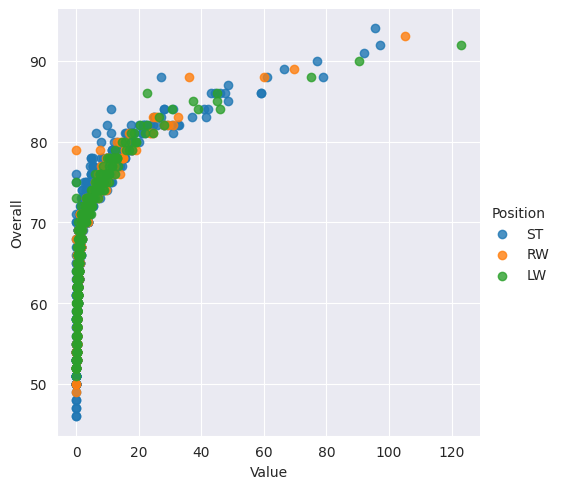

In [12]:
# use color for hue distinction, the default setting
sns.lmplot(x='Value',y='Overall',hue='Position',data=footballers.loc[footballers['Position'].isin(['ST','RW','LW'])],fit_reg=False)
plt.show()


This scatterplot uses three visual variables. The horizontal position (x-value) tracks the Value of the player
(how well they are paid). The vertical position (y-value) tracks the Overall score of the player across all attributes.
And the color (the hue parameter) tracks which of the three categories of interest the player the point represents is in.

The new variable in this chart is color. Color provides an aesthetically pleasing visual, but it's tricky to use.
Looking at this scatter plot we see the same overplotting issue we saw in previous sections. But we no longer have an
easy solution, like using a hex plot, because color doesn't make sense in that setting.

Another example visual variable is shape. Shape controls, well, the shape of the marker:
